In [312]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('clean_data.csv', sep=',')

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7455 entries, 0 to 7454
Data columns (total 39 columns):
Unnamed: 0                          7455 non-null int64
Termination_Reason                  7455 non-null object
Compensation_Range___Midpoint       7455 non-null int64
Total_Base_Pay___Local              7455 non-null float64
Job_Sub_Function__IA__Host_All_O    7455 non-null object
Length_of_Service_in_Years_inclu    7455 non-null float64
Job_Function__IA__Host_All_Other    7455 non-null object
Promotion                           7455 non-null int64
Demotion                            7455 non-null int64
Lateral                             7455 non-null int64
Cross_Move                          7455 non-null int64
Trainings_Completed                 7455 non-null float64
Mgr_Change                          7455 non-null int64
SkipLevel_Mgr_Change                7455 non-null int64
Rehire_YN                           7455 non-null object
_018_Planned_as_a___of_Bonus_Tar    7455 no

In [314]:
df2 = df[df.Job_Function__IA__Host_All_Other == 'Operations']
df = df[df.Job_Function__IA__Host_All_Other != 'Operations']
df = df[df.Length_of_Service_in_Years_inclu < 30.0]

In [315]:
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator

In [316]:
df['delta'] = df['delta'].astype(bool)
df2['delta'] = df2['delta'].astype(bool)

In [317]:
time, survival_prob = kaplan_meier_estimator(df["delta"], df["Length_of_Service_in_Years_inclu"])

Text(0.5, 0, 'time $t$')

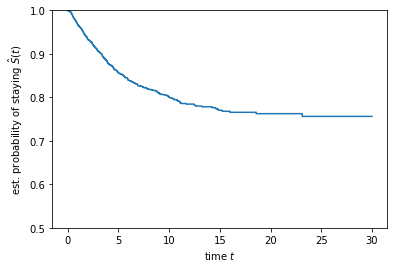

In [318]:
plt.step(time, survival_prob, where="post")
plt.ylim(0.5,1)
plt.ylabel("est. probability of staying $\hat{S}(t)$")
plt.xlabel("time $t$")

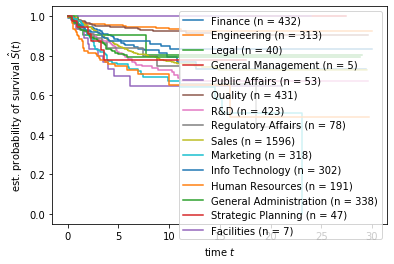

In [319]:
for value in df["Job_Function__IA__Host_All_Other"].unique():
    mask = df["Job_Function__IA__Host_All_Other"] == value
    time_cell, survival_prob_cell = kaplan_meier_estimator(df["delta"][mask],
                                                           df["Length_of_Service_in_Years_inclu"][mask])
    plt.step(time_cell, survival_prob_cell, where="post",
             label="%s (n = %d)" % (value, mask.sum()))

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

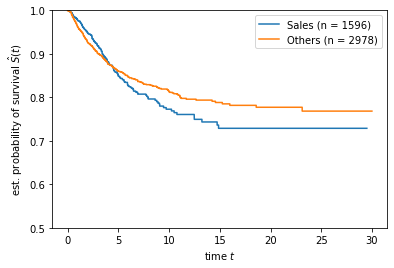

In [320]:
mask = df["Job_Function__IA__Host_All_Other"] == 'Sales'
time_cell, survival_prob_cell = kaplan_meier_estimator(df["delta"][mask],
                                                           df["Length_of_Service_in_Years_inclu"][mask])
plt.step(time_cell, survival_prob_cell, where="post",
             label="%s (n = %d)" % ('Sales', mask.sum()))

mask = df["Job_Function__IA__Host_All_Other"] != 'Sales'
time_cell, survival_prob_cell = kaplan_meier_estimator(df["delta"][mask],
                                                           df["Length_of_Service_in_Years_inclu"][mask])
plt.step(time_cell, survival_prob_cell, where="post",
             label="%s (n = %d)" % ('Others', mask.sum()))

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.ylim(0.5,1)
plt.legend(loc="best")

In [321]:
data_y = pd.DataFrame()

In [322]:
data_y['Status'] = df['delta']

In [323]:
data_y['time'] = df['Length_of_Service_in_Years_inclu']

In [324]:
data_y.head(20)

,Status,time
0,False,29.43
1,False,28.89
2,False,28.98
3,False,18.76
4,False,16.30
5,False,11.50
14,False,9.89
15,True,5.67
16,False,9.91
17,False,9.91


In [325]:
data_x = df.drop(["delta","Length_of_Service_in_Years_inclu", "Termination_Reason"], axis=1)
data_x2 = df2.drop(["delta","Length_of_Service_in_Years_inclu", "Termination_Reason"], axis=1)

In [326]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4574 entries, 0 to 7454
Data columns (total 36 columns):
Unnamed: 0                          4574 non-null int64
Compensation_Range___Midpoint       4574 non-null int64
Total_Base_Pay___Local              4574 non-null float64
Job_Sub_Function__IA__Host_All_O    4574 non-null object
Job_Function__IA__Host_All_Other    4574 non-null object
Promotion                           4574 non-null int64
Demotion                            4574 non-null int64
Lateral                             4574 non-null int64
Cross_Move                          4574 non-null int64
Trainings_Completed                 4574 non-null float64
Mgr_Change                          4574 non-null int64
SkipLevel_Mgr_Change                4574 non-null int64
Rehire_YN                           4574 non-null object
_018_Planned_as_a___of_Bonus_Tar    4574 non-null float64
_017_Planned_as_a___of_Bonus_Tar    4574 non-null float64
_016_Planned_as_a___of_Bonus_Tar    4574 n

In [327]:
for c in data_x.columns:
    if 'Rating' in c:
        print(c)
        data_x = data_x.drop(c, axis=1)
        data_x2 = data_x2.drop(c, axis=1)
data_x.info()

Employee_Rating_1_W
Employee_Rating_1_H
Employee_Rating_2_W
Employee_Rating_2_H
Employee_Rating_3_W
Employee_Rating_3_H
Manager_Rating_1_W
Manager_Rating_1_H
Manager_Rating_2_W
Manager_Rating_2_H
Manager_Rating_3_W
Manager_Rating_3_H
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4574 entries, 0 to 7454
Data columns (total 24 columns):
Unnamed: 0                          4574 non-null int64
Compensation_Range___Midpoint       4574 non-null int64
Total_Base_Pay___Local              4574 non-null float64
Job_Sub_Function__IA__Host_All_O    4574 non-null object
Job_Function__IA__Host_All_Other    4574 non-null object
Promotion                           4574 non-null int64
Demotion                            4574 non-null int64
Lateral                             4574 non-null int64
Cross_Move                          4574 non-null int64
Trainings_Completed                 4574 non-null float64
Mgr_Change                          4574 non-null int64
SkipLevel_Mgr_Change                4

In [328]:
for c in data_x.columns:
    if data_x[c].dtype == object:
        print(c)
        data_x[c] = data_x[c].astype('category')
        data_x2[c] = data_x2[c].astype('category')

Job_Sub_Function__IA__Host_All_O
Job_Function__IA__Host_All_Other
Rehire_YN


In [329]:
data_x['Job_Sub_Function__IA__Host_All_O'].value_counts()

Selling MD&D                     380
Finance                          346
Selling Pharmaceutical           344
Selling Consumer                 272
Sales Administration             266
Administration                   251
Quality Control                  238
R&D                              205
Info Technology                  198
Selling                          188
Marketing                        172
Quality Assurance                118
Product Management               111
Industrial Manufacturing          92
Engineering (Generalist)          92
Human Resources                   58
Regulatory Affairs                54
HR Operations                     52
Medical Affairs                   51
Medical Science Liaison           50
Clinical Trial Administration     48
Trade Relations                   48
Employment                        47
National Accounts                 43
Process Engineering               43
Environmental Health & Safety     39
Events Planning                   38
Q

In [330]:
data_x = data_x.drop(["Job_Sub_Function__IA__Host_All_O"], axis=1)
data_x2 = data_x2.drop(["Job_Sub_Function__IA__Host_All_O"], axis=1)

In [331]:
from sksurv.preprocessing import OneHotEncoder

In [332]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4574 entries, 0 to 7454
Data columns (total 23 columns):
Unnamed: 0                          4574 non-null int64
Compensation_Range___Midpoint       4574 non-null int64
Total_Base_Pay___Local              4574 non-null float64
Job_Function__IA__Host_All_Other    4574 non-null category
Promotion                           4574 non-null int64
Demotion                            4574 non-null int64
Lateral                             4574 non-null int64
Cross_Move                          4574 non-null int64
Trainings_Completed                 4574 non-null float64
Mgr_Change                          4574 non-null int64
SkipLevel_Mgr_Change                4574 non-null int64
Rehire_YN                           4574 non-null category
_018_Planned_as_a___of_Bonus_Tar    4574 non-null float64
_017_Planned_as_a___of_Bonus_Tar    4574 non-null float64
_016_Planned_as_a___of_Bonus_Tar    4574 non-null float64
Highest_Degree_Received             4

In [333]:
data_x = data_x.drop(["Length_of_Service_in_Years_log"], axis=1)
data_x2 = data_x2.drop(["Length_of_Service_in_Years_log"], axis=1)

In [334]:
data_x['Rehire_YN'] = data_x['Rehire_YN'].cat.codes
data_x2['Rehire_YN'] = data_x2['Rehire_YN'].cat.codes

In [335]:
print(data_x['Rehire_YN'].head(20))
print(data_x['Job_Function__IA__Host_All_Other'].head(20))

0     0
1     0
2     0
3     0
4     0
5     0
14    0
15    1
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    1
24    0
25    0
26    0
27    0
Name: Rehire_YN, dtype: int8
0                Finance
1            Engineering
2                  Legal
3     General Management
4         Public Affairs
5                Finance
14               Quality
15               Quality
16               Quality
17               Quality
18               Quality
19               Quality
20               Quality
21                   R&D
22           Engineering
23               Quality
24               Quality
25               Quality
26                   R&D
27               Quality
Name: Job_Function__IA__Host_All_Other, dtype: category
Categories (15, object): [Engineering, Facilities, Finance, General Administration, ..., R&D, Regulatory Affairs, Sales, Strategic Planning]


In [336]:
data_x = data_x.drop(["Job_Function__IA__Host_All_Other"], axis=1)
data_x2 = data_x2.drop(["Job_Function__IA__Host_All_Other"], axis=1)

In [337]:
data_x_numeric = OneHotEncoder().fit_transform(data_x)
data_x2_numeric = OneHotEncoder().fit_transform(data_x2)
data_x_numeric.head()

,Unnamed: 0,Compensation_Range___Midpoint,Total_Base_Pay___Local,Promotion,Demotion,Lateral,Cross_Move,Trainings_Completed,Mgr_Change,SkipLevel_Mgr_Change,...,_018_Planned_as_a___of_Bonus_Tar,_017_Planned_as_a___of_Bonus_Tar,_016_Planned_as_a___of_Bonus_Tar,Highest_Degree_Received,Compa_Diff_Ratio,Compa_Ratio,Sales_Incentive_2016,Sales_Incentive_2017,Sales_Incentive_2018,Job_Function_encoded
0,0,347000,448253.44,0,0,0,0,-999.0,1,0,...,0.909109,1.099959,0.818195,-999,0.291797,1.291797,-999.0,-999.0,-999.0,2
1,1,347000,416473.44,0,0,0,0,-999.0,4,0,...,0.600014,0.818473,0.682686,4,0.200212,1.200212,-999.0,-999.0,-999.0,2
2,2,347000,455783.44,0,1,0,1,1.0,2,0,...,1.090936,1.067791,1.226850,4,0.313497,1.313497,-999.0,-999.0,-999.0,2
3,3,1200000,1366273.44,0,0,0,0,-999.0,2,0,...,1.000002,0.950348,1.000080,-999,0.138561,1.138561,-999.0,-999.0,-999.0,2
4,4,671000,606433.44,1,0,0,0,1.0,0,1,...,1.200007,0.999797,1.982450,6,-0.096224,0.903776,-999.0,-999.0,-999.0,2


In [338]:
data_x_numeric = data_x_numeric.drop(["Unnamed: 0"], axis=1)
data_x_numeric = data_x_numeric.drop(["Job_Function_encoded"], axis=1)
data_x2_numeric = data_x2_numeric.drop(["Unnamed: 0"], axis=1)

In [339]:
for c in data_x_numeric.columns:
    if 'Missing' in c:
        print(c)
        data_x_numeric = data_x_numeric.drop(c, axis=1)
        data_x2_numeric = data_x2_numeric.drop(c, axis=1)

In [340]:
print(data_x_numeric.columns)
data_x_numeric.info()

Index(['Compensation_Range___Midpoint', 'Total_Base_Pay___Local', 'Promotion',
       'Demotion', 'Lateral', 'Cross_Move', 'Trainings_Completed',
       'Mgr_Change', 'SkipLevel_Mgr_Change', 'Rehire_YN',
       '_018_Planned_as_a___of_Bonus_Tar', '_017_Planned_as_a___of_Bonus_Tar',
       '_016_Planned_as_a___of_Bonus_Tar', 'Highest_Degree_Received',
       'Compa_Diff_Ratio', 'Compa_Ratio', 'Sales_Incentive_2016',
       'Sales_Incentive_2017', 'Sales_Incentive_2018'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4574 entries, 0 to 7454
Data columns (total 19 columns):
Compensation_Range___Midpoint       4574 non-null int64
Total_Base_Pay___Local              4574 non-null float64
Promotion                           4574 non-null int64
Demotion                            4574 non-null int64
Lateral                             4574 non-null int64
Cross_Move                          4574 non-null int64
Trainings_Completed                 4574 non-null float64


In [341]:
from sksurv.linear_model import CoxPHSurvivalAnalysis

#print(data_y.values)
tuples = np.array([tuple(x) for x in data_y.values],dtype=[('Status', '?'), ('Survival_in_days', '<f8')])
tuples

array([(False, 29.43), (False, 28.89), (False, 28.98), ...,
       (False,  1.54), (False,  1.54), (False,  0.61)],
      dtype=[('Status', '?'), ('Survival_in_days', '<f8')])

In [342]:
estimator = CoxPHSurvivalAnalysis()
estimator.fit(data_x_numeric[:4000], tuples[:4000])

C:\Users\jchaves6\AppData\Local\Continuum\anaconda3\lib\site-packages\sksurv\linear_model\coxph.py:330: LinAlgWarning: Ill-conditioned matrix (rcond=3.4247e-31): result may not be accurate.
  overwrite_a=False, overwrite_b=False, check_finite=False)
C:\Users\jchaves6\AppData\Local\Continuum\anaconda3\lib\site-packages\sksurv\linear_model\coxph.py:330: LinAlgWarning: Ill-conditioned matrix (rcond=1.45142e-31): result may not be accurate.
  overwrite_a=False, overwrite_b=False, check_finite=False)
C:\Users\jchaves6\AppData\Local\Continuum\anaconda3\lib\site-packages\sksurv\linear_model\coxph.py:330: LinAlgWarning: Ill-conditioned matrix (rcond=1.13803e-33): result may not be accurate.
  overwrite_a=False, overwrite_b=False, check_finite=False)
C:\Users\jchaves6\AppData\Local\Continuum\anaconda3\lib\site-packages\sksurv\linear_model\coxph.py:330: LinAlgWarning: Ill-conditioned matrix (rcond=5.86483e-32): result may not be accurate.
  overwrite_a=False, overwrite_b=False, check_finite=Fals

CoxPHSurvivalAnalysis(alpha=0, n_iter=100, tol=1e-09, verbose=0)

In [343]:
data_y.isna().values.sum()

0

In [344]:
pd.Series(estimator.coef_, index=data_x_numeric.columns)

Compensation_Range___Midpoint      -7.754523e-10
Total_Base_Pay___Local             -1.486034e-06
Promotion                          -2.562486e-01
Demotion                           -2.095013e+00
Lateral                            -2.327276e-01
Cross_Move                         -6.565594e-01
Trainings_Completed                -6.277749e-04
Mgr_Change                         -2.155567e-01
SkipLevel_Mgr_Change                3.448959e-01
Rehire_YN                          -1.850708e+00
_018_Planned_as_a___of_Bonus_Tar   -2.969412e-03
_017_Planned_as_a___of_Bonus_Tar    8.033640e-04
_016_Planned_as_a___of_Bonus_Tar    4.886531e-04
Highest_Degree_Received            -1.007647e-04
Compa_Diff_Ratio                    2.966721e+00
Compa_Ratio                        -4.217827e+00
Sales_Incentive_2016                7.695419e-04
Sales_Incentive_2017               -1.897664e-02
Sales_Incentive_2018               -1.449975e-02
dtype: float64

In [345]:
data_x2_numeric.head()

,Compensation_Range___Midpoint,Total_Base_Pay___Local,Promotion,Demotion,Lateral,Cross_Move,Trainings_Completed,Mgr_Change,SkipLevel_Mgr_Change,Rehire_YN,_018_Planned_as_a___of_Bonus_Tar,_017_Planned_as_a___of_Bonus_Tar,_016_Planned_as_a___of_Bonus_Tar,Highest_Degree_Received,Compa_Diff_Ratio,Compa_Ratio,Sales_Incentive_2016,Sales_Incentive_2017,Sales_Incentive_2018,Job_Function_encoded
6,35000,30603.89,1,0,1,0,-999.0,4,0,0,-999.0,-999.0,-999.0,-999,-0.125603,0.874397,-999.0,-999.0,-999.0,0
7,35000,30453.17,1,0,1,0,-999.0,4,0,0,-999.0,-999.0,-999.0,-999,-0.129909,0.870091,-999.0,-999.0,-999.0,0
8,35000,32615.37,0,0,0,0,-999.0,1,0,0,-999.0,-999.0,-999.0,-999,-0.068132,0.931868,-999.0,-999.0,-999.0,0
9,44000,53913.60,1,0,1,0,-999.0,5,0,0,-999.0,-999.0,-999.0,-999,0.225309,1.225309,-999.0,-999.0,-999.0,0
10,35000,30909.94,1,0,1,0,-999.0,4,0,0,-999.0,-999.0,-999.0,-999,-0.116859,0.883141,-999.0,-999.0,-999.0,0


In [346]:
data_x_test = data_x_numeric[4000:]
pred_surv = estimator.predict_survival_function(data_x_test)

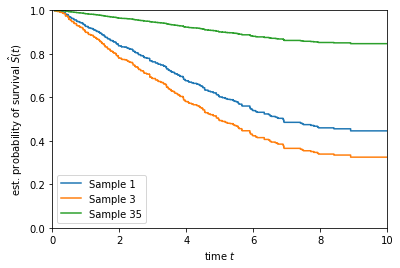

In [362]:
#for i, c in enumerate(pred_surv[:6]):
    #plt.step(c.x, c.y, where="post", label="Sample %d" % (i + 1))
    #print(c.x, c.y)
plt.step(pred_surv[0].x, pred_surv[0].y, where="post", label="Sample %d" % (0 + 1))
plt.step(pred_surv[2].x, pred_surv[2].y, where="post", label="Sample %d" % (2 + 1))
#plt.step(pred_surv[6].x, pred_surv[6].y, where="post", label="Sample %d" % (6 + 1))
plt.step(pred_surv[34].x, pred_surv[34].y, where="post", label="Sample %d" % (34 + 1))
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.ylim(0.0,1.0)
plt.xlim(0.0,10.0)
plt.legend(loc="best")

print(data_x_test['Total_Base_Pay___Local'][30:31])

In [348]:
print(data_x_test[:6]['Total_Base_Pay___Local'])

6230    72611.49
6231    72611.49
6233    38450.88
6245    96642.70
6248    53564.06
6249    79709.76
Name: Total_Base_Pay___Local, dtype: float64


In [349]:
sum(pred_surv[34].y < 0.3)

0

In [350]:
high_risk = []
for i,p in enumerate(pred_surv):
    #print(sum(p.y < 0.3))
    if sum(p.y < 0.3) > 0:
        high_risk.append(data_x_test[i:i+1].index[0])

In [351]:
high_risk

[6233,
 6299,
 6301,
 6348,
 6395,
 6399,
 6409,
 6442,
 6445,
 6497,
 6501,
 6531,
 6543,
 6597,
 6621,
 6630,
 6675,
 6677,
 6685,
 6692,
 6693,
 6707,
 6713,
 7098,
 7193,
 7230,
 7238,
 7272,
 7276,
 7280,
 7303,
 7348,
 7359,
 7368,
 7369,
 7370,
 7372,
 7373,
 7374,
 7376,
 7380,
 7381,
 7384,
 7385,
 7386,
 7390,
 7398,
 7400,
 7401,
 7402,
 7407,
 7415,
 7417,
 7420,
 7424,
 7426,
 7429,
 7432,
 7433,
 7436,
 7439,
 7441,
 7448,
 7451]

In [352]:
df.loc[6128].Termination_Reason

KeyError: 'the label [6128] is not in the [index]'

In [ ]:
for h in high_risk:
    print(df.loc[h].Termination_Reason)

In [ ]:
medium_risk = []
for i,p in enumerate(pred_surv):
    #print(sum(p.y < 0.3))
    if sum(p.y < 0.7) > 0:
        medium_risk.append(data_x_test[i:i+1].index[0])

In [ ]:
medium_risk = [x for x in medium_risk if x not in high_risk]

In [ ]:
medium_risk

In [ ]:
for h in medium_risk:
    print(df.loc[h].Termination_Reason)

In [ ]:
low_risk = []
for i,p in enumerate(pred_surv):
    #print(sum(p.y < 0.3))
    low_risk.append(data_x_test[i:i+1].index[0])
low_risk = [x for x in low_risk if x not in high_risk and x not in medium_risk]

In [ ]:
low_risk

In [ ]:
for h in low_risk:
    print(df.loc[h].Termination_Reason)

In [ ]:
n_censored = data_y.shape[0] - data_y["Status"].sum()
print("%.1f%% of records are censored" % (n_censored / data_y.shape[0] * 100))

In [365]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
#import seaborn as sns
from sklearn.model_selection import ShuffleSplit, GridSearchCV

from sksurv.datasets import load_veterans_lung_cancer
from sksurv.column import encode_categorical
from sksurv.metrics import concordance_index_censored
from sksurv.svm import FastSurvivalSVM

#sns.set_style("whitegrid")

In [366]:
estimator = FastSurvivalSVM(optimizer="rbtree", max_iter=1000, tol=1e-6, random_state=0)

In [367]:
def score_survival_model(model, X, y):
    prediction = model.predict(X)
    result = concordance_index_censored(y['Status'], y['Survival_in_days'], prediction)
    return result[0]

In [ ]:
param_grid = {'alpha': 2. ** np.arange(-12, 13, 2)}

In [ ]:
cv = ShuffleSplit(n_splits=200, test_size=0.5, random_state=0)
gcv = GridSearchCV(estimator, param_grid, scoring=score_survival_model,
                   n_jobs=4, iid=False, refit=False,
                   cv=cv)

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
gcv = gcv.fit(data_x_numeric[:4000], tuples[:4000])

In [ ]:
gcv.best_score_, gcv.best_params_

In [ ]:
def plot_performance(gcv):
    n_splits = gcv.cv.n_splits
    cv_scores = {"alpha": [], "test_score": [], "split": []}
    order = []
    for i, params in enumerate(gcv.cv_results_["params"]):            
        name = "%.5f" % params["alpha"]
        order.append(name)
        for j in range(n_splits):
            vs = gcv.cv_results_["split%d_test_score" % j][i]
            cv_scores["alpha"].append(name)
            cv_scores["test_score"].append(vs)
            cv_scores["split"].append(j)
    df = pandas.DataFrame.from_dict(cv_scores)
    _, ax = plt.subplots(figsize=(11, 6))
    sns.boxplot(x="alpha", y="test_score", data=df, order=order, ax=ax)
    _, xtext = plt.xticks()
    for t in xtext:
        t.set_rotation("vertical")

In [ ]:
plot_performance(gcv)

In [368]:
estimator_best = FastSurvivalSVM(alpha=0.000244140625, optimizer="rbtree", max_iter=1000, tol=1e-6, random_state=0)

In [369]:
estimator_best.fit(data_x_numeric[:4000], tuples[:4000])

FastSurvivalSVM(alpha=0.000244140625, fit_intercept=False, max_iter=1000,
        optimizer='rbtree', random_state=0, rank_ratio=1.0, timeit=False,
        tol=1e-06, verbose=False)

In [370]:
pd.Series(estimator_best.coef_, index=data_x_numeric.columns)

Compensation_Range___Midpoint      -8.881950e-10
Total_Base_Pay___Local              3.544756e-13
Promotion                           2.452012e-18
Demotion                            5.056915e-19
Lateral                             1.367501e-18
Cross_Move                          1.256616e-18
Trainings_Completed                 8.780234e-16
Mgr_Change                          1.014455e-17
SkipLevel_Mgr_Change               -1.262606e-18
Rehire_YN                           4.054868e-19
_018_Planned_as_a___of_Bonus_Tar    3.320782e-15
_017_Planned_as_a___of_Bonus_Tar    2.339322e-15
_016_Planned_as_a___of_Bonus_Tar   -6.492756e-16
Highest_Degree_Received             1.611735e-15
Compa_Diff_Ratio                    1.411668e-18
Compa_Ratio                         1.411668e-18
Sales_Incentive_2016                8.364044e-16
Sales_Incentive_2017                2.067155e-15
Sales_Incentive_2018                1.830952e-15
dtype: float64

In [ ]:
data_x_test = data_x_numeric[4000:]

In [ ]:
data_x_test

In [ ]:
estimator_best.predict(data_x_test.values[:6])